In [1]:
from fastai.tabular import *

In [2]:
path = 'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_original/'
path

'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_original/'

In [3]:
df = pd.read_csv(path + 'dataset_esquizotipia_original.csv')
df.head()

,ESTRES_PERCIBIDO,CSI_RESPROBL,CSI_REESTCOGN,CSI_APOYOSOC,CSI_EXPEMOC,CSI_EVITPROBL,CSI_PENSDESID,CSI_RETISOC,CSI_AUTOCRIT,ANSIEDADRASGO,...,SCL90_PSICOT,CAPE_POSIT_FREC,CAPE_POS_MALESTAR,CAPE_NEG_FREC,CAPE_NEG_MALESTAR,CAPE_DEPRE_FREC,CAPE_DEPRE_MALESTAR,TRAUMA_FRECUENCIA,TRAUMA_AFECTACION,SPQ_TOTAL_ESQUIZOT
0,23,17,5,0,0,7,5,13,2,20,...,0,24,4,14,0,8,0,4,8,0
1,22,13,11,3,10,6,11,17,11,17,...,9,22,2,29,33,11,3,9,29,0
2,10,20,20,20,16,11,8,3,0,20,...,5,30,9,29,21,10,2,12,25,1
3,7,12,1,0,7,4,6,3,1,18,...,0,20,0,16,2,8,0,4,10,0
4,31,8,9,17,13,4,14,2,6,27,...,17,35,13,36,26,19,19,17,48,2


In [4]:
procs = [FillMissing, Categorify, Normalize]

In [5]:
# se selecciona un 85% de los datos para entrenamiento y un 15% de los datos para validación
valid_idx  =  range ( len ( df ) - 43 ,  len ( df ))

In [6]:
# Se define la variable dependiente
dep_var  =  'SPQ_TOTAL_ESQUIZOT'

In [7]:
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs)
print(data.train_ds.cont_names) # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}

['CAPE_DEPRE_MALESTAR', 'CAPE_NEG_MALESTAR', 'SCL90_OBS_COMP', 'SCL90_SOMAT', 'CSL90_SENS_INT', 'CAPE_POSIT_FREC', 'CAPE_DEPRE_FREC', 'CSI_EVITPROBL', 'CSI_APOYOSOC', 'SCL90_ANS_FOB', 'SCL90_DEPRE', 'SCL90_ANSIE', 'SCL90_IDEA_PARAN', 'CSI_AUTOCRIT', 'CSI_RESPROBL', 'CSL90_HOSTIL', 'TRAUMA_FRECUENCIA', 'ANSIEDADRASGO', 'CSI_RETISOC', 'CSI_EXPEMOC', 'SCL90_PSICOT', 'CAPE_POS_MALESTAR', 'CSI_REESTCOGN', 'TRAUMA_AFECTACION', 'CSI_PENSDESID', 'ESTRES_PERCIBIDO', 'CAPE_NEG_FREC']


In [8]:
(cat_x,cont_x),y = next(iter(data.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))

[0 0 0 0 0]
[[-1.355057 -1.047394 -1.078584 -1.03472  ... -1.324919 -1.89064  -1.523076 -0.639246]
 [-0.802575  0.140229 -0.53907  -1.03472  ...  0.379676  0.106139 -1.762241 -0.098944]
 [ 1.82171   0.96243   0.647861 -0.259577 ...  0.251831  0.771732  0.629407  0.441358]
 [-0.664455  1.053785  0.108347  0.031101 ... -0.89877   0.106139  0.031495  0.171207]
 [ 2.512311  2.150053  1.187375  1.775173 ...  1.402432  0.93813   1.227319  1.116736]]
[0 0 0 1 1]


In [9]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)
learn.fit(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.019325,0.928218,0.627907,04:04
1,0.880718,0.903927,0.674419,02:55
2,0.781050,0.886801,0.697674,02:40
3,0.698040,0.893037,0.674419,02:39
4,0.641071,0.869638,0.697674,02:38


CAPE_DEPRE_MALESTAR,CAPE_NEG_MALESTAR,SCL90_OBS_COMP,SCL90_SOMAT,CSL90_SENS_INT,CAPE_POSIT_FREC,CAPE_DEPRE_FREC,CSI_EVITPROBL,CSI_APOYOSOC,SCL90_ANS_FOB,SCL90_DEPRE,SCL90_ANSIE,SCL90_IDEA_PARAN,CSI_AUTOCRIT,CSI_RESPROBL,CSL90_HOSTIL,TRAUMA_FRECUENCIA,ANSIEDADRASGO,CSI_RETISOC,CSI_EXPEMOC,SCL90_PSICOT,CAPE_POS_MALESTAR,CSI_REESTCOGN,TRAUMA_AFECTACION,CSI_PENSDESID,ESTRES_PERCIBIDO,CAPE_NEG_FREC,target,prediction
0.4405,-0.0425,0.3242,0.5156,-0.6075,-0.1545,0.1242,1.6571,1.6052,-0.6880,0.8337,0.6526,-0.8979,2.0858,-0.7208,-0.6153,-0.3719,0.3519,-0.8236,0.3497,0.5051,0.2197,-0.3993,-0.1317,0.7717,1.5861,0.0361,0,0
-0.9407,-0.1338,-1.0786,-0.9378,-0.8801,-0.3149,-0.8044,-0.5445,-0.0856,-0.6880,-1.0102,-0.9115,-0.8979,-0.5605,1.5119,-0.6153,-0.9380,-0.7190,-0.4005,-0.0288,-0.8305,-0.6739,1.8312,-0.7283,-1.2250,-1.2839,-0.3691,0,0
1.4073,0.6884,1.1874,1.8721,0.6192,-0.1545,0.5885,0.3361,-0.0856,2.0954,1.7155,2.5776,1.2508,0.4980,-0.3149,0.4588,-0.7493,0.1990,0.2342,0.1605,1.1729,0.2197,0.3442,-0.6005,0.1061,1.1077,0.1712,0,1
0.0261,0.0489,1.1874,0.5156,0.3466,-0.3149,1.2849,2.7579,-1.4383,0.0542,1.2345,-0.3100,0.0788,-0.3841,-1.5327,1.3180,1.9866,-1.0250,2.5613,-1.3537,-0.1627,-0.4505,-1.1428,1.6155,0.6053,0.8686,1.7921,1,0
1.9598,1.3279,0.7558,1.0000,1.3007,-0.1545,1.0528,-1.2050,-1.6073,0.2398,0.4328,0.5323,1.4461,0.4980,-1.7357,0.0292,-0.3719,-0.8720,1.0804,-1.5430,0.2380,0.3314,-1.7004,0.1666,-1.0586,1.3469,1.2518,1,1


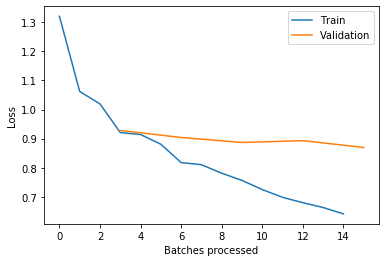

In [10]:
learn.recorder.plot_losses()
learn.show_results()